In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import expit
import scipy.io
import matplotlib.cm as cm
import random

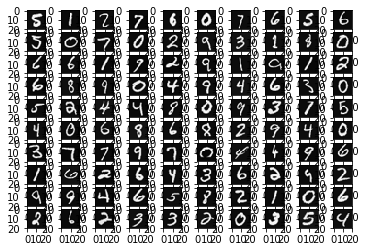

In [71]:
#1.2 visualizing the data
data=scipy.io.loadmat("ex3/data/ex3data1.mat")
X=data['X']
Y=data['y']
Y=np.where(Y==10,0,Y)
data_size=X.shape[0]
width=10
height=10
plt.figure()
for i in range(width*height):
    plt.subplot(height,width,i+1)
    rand_idx=random.randint(0,data_size-1)
    plt.imshow(X[rand_idx].reshape((20,20)).T,cmap='gray')
plt.show()

In [60]:
#1.3 vectorizing logistic regression && #1.4
def H(x,theta):
    return expit(np.dot(x,theta))
def Cost(theta,x,y,lamb=0.0):
    hx=H(x,theta)
    s0=-y*np.log(hx)
    s1=(1.0-y)*np.log(1.0-hx)+lamb/x.shape[0]*np.sum(theta*theta)
    return np.mean(s0-s1)
def Gradient(theta,x,y,alpha,lamb=0.0):
    hx=H(x,theta)
    m=x.shape[0]
    theta_change=(np.dot(x.T,(hx-y))+lamb*np.sum(theta))*(alpha/m)
    return theta_change
thetas=(np.zeros((10,X.shape[1],1)))
iterations=4000
lamb=0.0
alpha=2
for num in range(10):
    nowY=np.where(Y==num,1,0)
    for i in range(iterations):
        cost=Cost(thetas[num],X,nowY,lamb)
        gradient=Gradient(thetas[num],X,nowY,alpha,lamb)
        thetas[num]-=gradient
result=(np.dot(thetas.reshape(10,X.shape[1]),X.T)).argmax(axis=0)
prec=(result.reshape(Y.shape)==Y)+0
print(np.sum(prec)/prec.shape[0])

0.9464


In [82]:
#2 neural networks
data=scipy.io.loadmat("ex3/data/ex3weights.mat")
theta1=data['Theta1']
theta2=data['Theta2']
newX=np.concatenate((np.ones((X.shape[0],1)),X),axis=1)
mid=H(newX,theta1.T)
newMid=np.concatenate((np.ones((mid.shape[0],1)),mid),axis=1)
pred=H(newMid,theta2.T)
result=(pred.argmax(axis=1)+1)%10
prec=(result.reshape(Y.shape)==Y)+0
print(np.sum(prec)/prec.shape[0])

0.9752
